In [236]:
import pandas as pd
import numpy as np
from operator import itemgetter
import pandas_profiling
from matplotlib_venn import venn2

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
data_path = '../readonly/final_project_data'

In [3]:
from os import listdir, path
file_names = listdir(data_path)
file_names

['sales_train_v2.csv',
 'shops.csv',
 'test.csv',
 'item_categories.csv',
 'items.csv',
 'sales_train_mathematica.dat',
 'sample_submission.csv']

In [239]:
train = pd.read_csv(path.join(data_path,'sales_train_v2.csv'))
test = pd.read_csv(path.join(data_path,'test.csv'))
categories = pd.read_csv(path.join(data_path,'items.csv'))
shops = pd.read_csv(path.join(data_path,'shops.csv'))

In [40]:
shops['city']=shops.shop_name.apply(str.split).apply(itemgetter(0)).apply(str.strip,args='!')


In [165]:
import geocoder
shops['coordinates']=[geocoder.yandex(c).latlng for c in shops.city.values]

In [166]:
list(builtins.map(float,['62.028103', '129.732663']))

[62.028103, 129.732663]

In [234]:
shops['lat']=shops.coordinates.drop([9,12,55]).apply(itemgetter(0)).apply(float)
shops['long']=shops.coordinates.drop([9,12,55]).apply(itemgetter(1)).apply(float)

shops

,shop_name,shop_id,city,coordinates,lat,long
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,"[62.028103, 129.732663]",62.028103,129.732663
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,"[62.028103, 129.732663]",62.028103,129.732663
2,"Адыгея ТЦ ""Мега""",2,Адыгея,"[44.429866, 40.252969]",44.429866,40.252969
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,"[55.796339, 37.938199]",55.796339,37.938199
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,"[48.786293, 44.751867]",48.786293,44.751867
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,"[59.220473, 39.891559]",59.220473,39.891559
6,"Воронеж (Плехановская, 13)",6,Воронеж,"[51.661535, 39.200287]",51.661535,39.200287
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,"[51.661535, 39.200287]",51.661535,39.200287
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,"[51.661535, 39.200287]",51.661535,39.200287
9,Выездная Торговля,9,Выездная,"[52.480694, 120.451081]",NaN,NaN


In [235]:
shops[['shop_id','lat','long']].to_csv('../data/coordinates.csv',header=True,index=False)

In [87]:
shops.city.to_csv('../data/city_name_rus.csv')

In [94]:
shops.coordinates[1][1]

129.732663

In [5]:
train.date = pd.to_datetime(train['date'],   format='%d.%m.%Y')



In [6]:
cat_names = ['date_block_num','shop_id','item_id']
for cat in cat_names:
    train[cat] = train[cat].astype('category')

cat_names = ['shop_id','item_id']
for cat in cat_names:
    test[cat] = test[cat].astype('category')

cat_names = ['item_name', 'item_id', 'item_category_id']
for cat in cat_names:
    categories[cat] = categories[cat].astype('category')

In [7]:
cm = pd.crosstab(train['item_cnt_day'], train['item_id'])


In [10]:
cramers_v(cm)

0.038388861573695726

In [11]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null category
item_id             22170 non-null category
item_category_id    22170 non-null category
dtypes: category(3)
memory usage: 1.7 MB


In [12]:
cramers_v(pd.DataFrame([[1,0],[0,1]]))

/Users/anatoly/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


nan

In [9]:
import scipy.stats as ss
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0,phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [238]:
pd.merge(train,shops,on='shop_id')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,coordinates,lat,long
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
1,10.01.2013,0,59,22151,399.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
2,04.01.2013,0,59,5603,699.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
3,19.01.2013,0,59,5587,199.0,2.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
4,31.01.2013,0,59,5613,5571.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
5,10.01.2013,0,59,5623,699.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
6,14.01.2013,0,59,5623,699.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
7,10.01.2013,0,59,5629,2390.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
8,04.01.2013,0,59,5643,2390.0,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787
9,17.01.2013,0,59,5643,2390.0,2.0,"Ярославль ТЦ ""Альтаир""",Ярославль,"[57.626569, 39.893787]",57.626569,39.893787


In [13]:
pandas_profiling.ProfileReport(train)

Number of variables,6
Number of observations,2935849
Total Missing (%),0.0%
Total size in memory,79.2 MiB
Average record size in memory,28.3 B
Numeric,2
Categorical,3
Boolean,0
Date,1
Text (Unique),0
Rejected,0


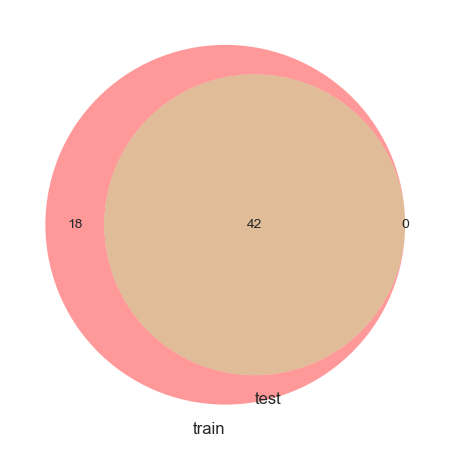

In [14]:
venn2([set(train.shop_id),set(test.shop_id)],['train','test'])

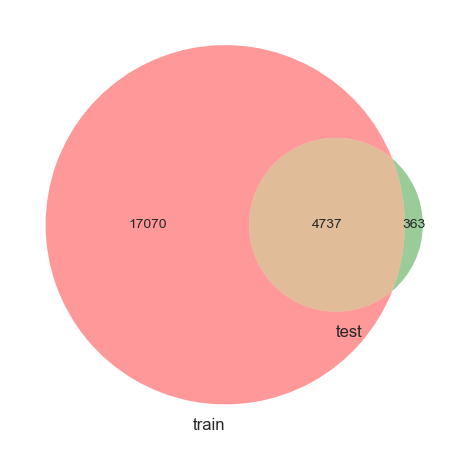

In [15]:
venn2([set(train.item_id),set(test.item_id)],['train','test'])

/Users/anatoly/anaconda3/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


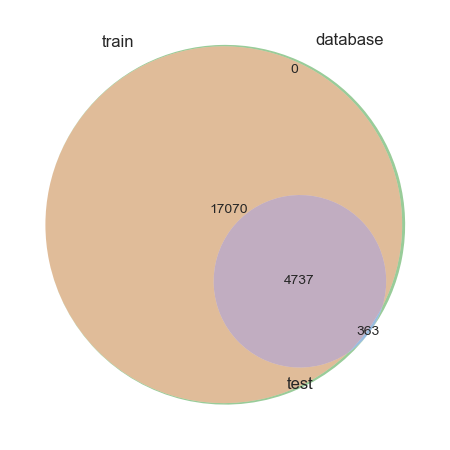

In [16]:
from matplotlib_venn import venn3
venn3([set(train.item_id),set(categories.item_id),set(test.item_id)],['train','database','test'])

In [17]:
categories.item_id.unique

<bound method Series.unique of 0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
22140    22140
22141    22141
22142    22142
22143    22143
22144    22144
22145    22145
22146    22146
22147    22147
22148    22148
22149    22149
22150    22150
22151    22151
22152    22152
22153    22153
22154    22154
22155    22155
22156    22156
22157    22157
22158    22158
22159    22159
22160    22160
22161    22161
22162    22162
22163    22163
22164    22164
22165    22165
22166    22166
22167    22167
22168    22168
22169    22169
Name: item_id, Length: 22170, dtype: category
Categori

In [18]:
venn3

<function matplotlib_venn._venn3.venn3>

In [19]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
6,2013-01-02,0,25,2565,549.00,1.0
7,2013-01-04,0,25,2572,239.00,1.0
8,2013-01-11,0,25,2572,299.00,1.0
9,2013-01-03,0,25,2573,299.00,3.0


In [40]:
grp = train.groupby(["date_block_num","shop_id","item_id"])["item_cnt_day"].sum()

In [44]:
train

item_price  item_cnt_day
shop_id item_id date_block_num                          
0       0       0                      NaN           NaN
                1                      NaN           NaN
                2                      NaN           NaN
                3                      NaN           NaN
                4                      NaN           NaN
                5                      NaN           NaN
                6                      NaN           NaN
                7                      NaN           NaN
                8                      NaN           NaN
                9                      NaN           NaN
                10                     NaN           NaN
                11                     NaN           NaN
                12                     NaN           NaN
                13                     NaN           NaN
                14                     NaN           NaN
                15                     NaN           NaN
                16                     NaN           NaN
                17                     NaN           NaN
                18                     NaN           NaN
                19                     NaN           NaN
                20                     NaN           NaN
                21                     NaN           NaN
                22                     NaN           NaN
                23                     NaN           NaN
                24                     NaN           NaN
                25                     NaN           NaN
                26                     NaN           NaN
                27                     NaN           NaN
                28                     NaN           NaN
                29                     NaN           NaN
...                                    ...           ...
59      22169   4                      NaN           NaN
                5                      NaN           NaN
                6                      NaN           NaN
                7                      NaN           NaN
                8                      NaN           NaN
                9                      NaN           NaN
                10                     NaN           NaN
                11                     NaN           NaN
                12                     NaN           NaN
                13                     NaN           NaN
                14                     NaN           NaN
                15                     NaN           NaN
                16                     NaN           NaN
                17                     NaN           NaN
                18                     NaN           NaN
                19                     NaN           NaN
                20                     NaN           NaN
                21                     NaN           NaN
                22                     NaN           NaN
                23                     NaN           NaN
                24                     NaN           NaN
                25                     NaN           NaN
                26                     NaN           NaN
                27                     NaN           NaN
                28                     NaN           NaN
                29                     NaN           NaN
                30                     NaN           NaN
                31                     NaN           NaN
                32                     NaN           NaN
                33                     NaN           NaN

[44486280 rows x 2 columns]